<a href="https://colab.research.google.com/github/sikha2552/Python_Imageprocessing_-Datacamp-/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter4**

Advanced Operations: Edge Detection, Face Recognition 

In [2]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray


In [35]:
def show_image(im,canny1,canny2,title1,title2,subfig_size=(20,15)):
  fig,ax=plt.subplots(nrows=1,ncols=3, figsize=subfig_size)
  ax[0].imshow(im);
  ax[0].set_title('Original image')
  ax[1].imshow(canny1,cmap='gray')
  ax[1].set_title(title1)
  ax[2].imshow(canny2,cmap='gray')
  ax[2].set_title(title2)
  for a in ax:
    a.axis('off')


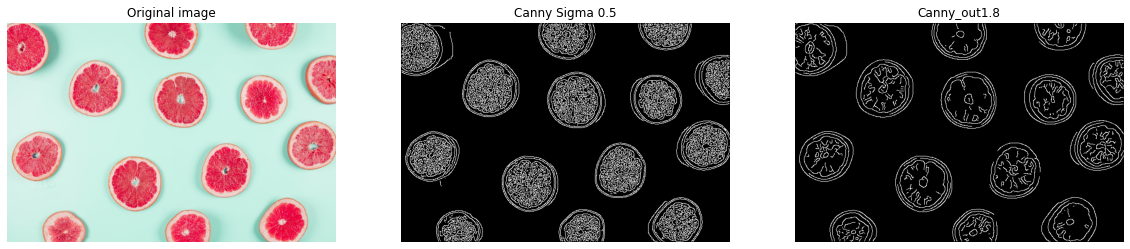

In [37]:
#import header
from skimage.feature import canny
im=plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/Chapter4/toronjas.jpg')
grayim=rgb2gray(im)
canny_out05=canny(grayim,sigma=0.5)
canny_out1=canny(grayim,sigma=1.8)
show_image(im,canny_out05,canny_out1,'Canny Sigma 0.5','Canny_out1.8')

# Corner Detection

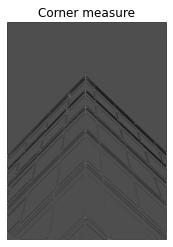

In [46]:
from skimage.feature import corner_harris,corner_peaks
im=plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/Chapter4/corners_building_top.jpg')
gray_im=rgb2gray(im)
measure_corner=corner_harris(gray_im)
plt.imshow(measure_corner,cmap='gray');
plt.axis('off')
plt.title('Corner measure')
plt.show()


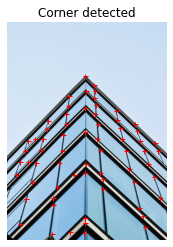

With a min_distance set to 20, we detect a total 66 corners in the image.


In [54]:
# Plac the detected corners on top of the original image
corner_coord=corner_peaks(measure_corner,min_distance=20,threshold_rel=0.02) #This will detect corners of minimum distance 5
#The threshold_rel parameter will specify the minimum intensity of peaks.
plt.imshow(im,cmap='gray');
plt.plot(corner_coord[:,1],corner_coord[:,0],'+r',markersize=5)
plt.axis('off')
plt.title('Corner detected')
plt.show()
print("With a min_distance set to 20, we detect a total", len(corner_coord), "corners in the image.")

In [41]:
corner_detected

array([[224, 327],
       [817, 327],
       [360, 327],
       ...,
       [596,  84],
       [561, 118],
       [580,  99]])

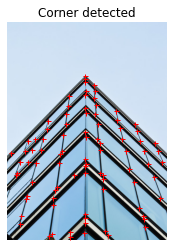

With a min_distance set to 10, we detect a total 89 corners in the image.


In [52]:
# Plac the detected corners on top of the original image
corner_coord=corner_peaks(measure_corner,min_distance=10,threshold_rel=0.02) #This will detect corners of minimum distance 5
#The threshold_rel parameter will specify the minimum intensity of peaks.
plt.imshow(im,cmap='gray');
plt.plot(corner_coord[:,1],corner_coord[:,0],'+r',markersize=5)
plt.axis('off')
plt.title('Corner detected')
plt.show()
print("With a min_distance set to 10, we detect a total", len(corner_coord), "corners in the image.")

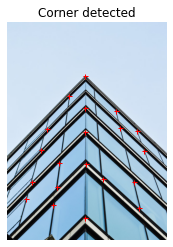

With a min_distance set to 60, we detect a total 20 corners in the image.


In [55]:
# Plac the detected corners on top of the original image
corner_coord=corner_peaks(measure_corner,min_distance=60,threshold_rel=0.02) #This will detect corners of minimum distance 5
#The threshold_rel parameter will specify the minimum intensity of peaks.
plt.imshow(im,cmap='gray');
plt.plot(corner_coord[:,1],corner_coord[:,0],'+r',markersize=5)
plt.axis('off')
plt.title('Corner detected')
plt.show()
print("With a min_distance set to 60, we detect a total", len(corner_coord), "corners in the image.")

As the distance increases the number of corner detected also decraeses

### **Face Detection**

In [8]:
import matplotlib.patches as patches

def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()
def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    crop_face(result, detected)


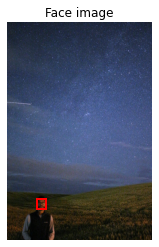

{'r': 774, 'c': 131, 'width': 40, 'height': 40}


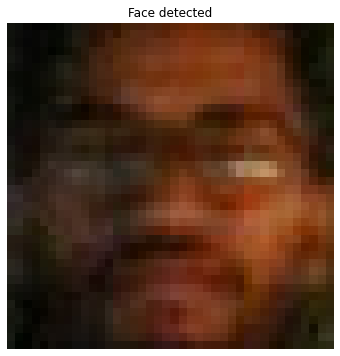

In [9]:
from skimage import data
from skimage.feature import Cascade

night_image = plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/Chapter4/face_det3.jpg')

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img=night_image, scale_factor=1.2,
                                       step_ratio=1, min_size=(10, 10), max_size=(200, 200))

# Show the detected faces
show_detected_face(night_image, detected)

In [10]:
im=plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/Chapter4/face_det25.jpg')

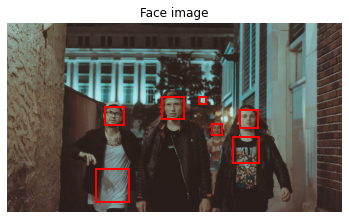

{'r': 263, 'c': 681, 'width': 25, 'height': 25}


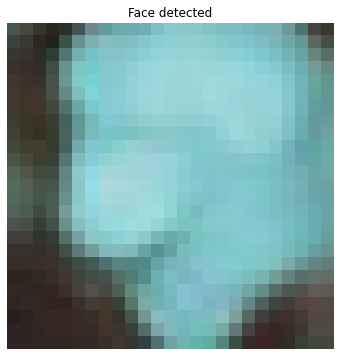

{'r': 296, 'c': 348, 'width': 65, 'height': 65}


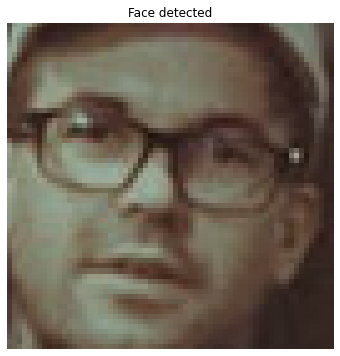

{'r': 358, 'c': 725, 'width': 37, 'height': 37}


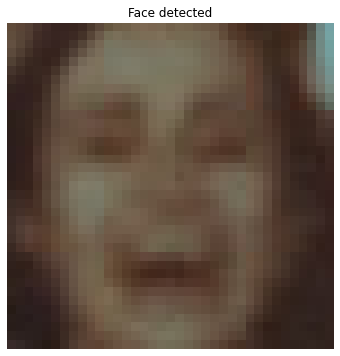

{'r': 403, 'c': 800, 'width': 91, 'height': 91}


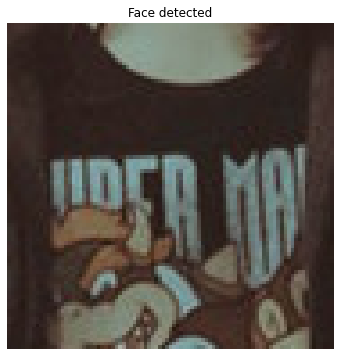

{'r': 518, 'c': 316, 'width': 117, 'height': 117}


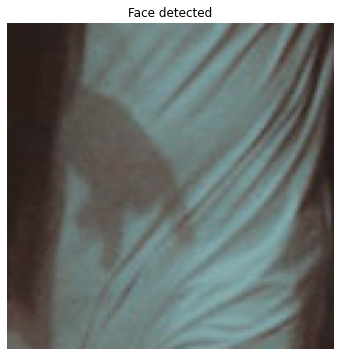

{'r': 261, 'c': 548, 'width': 78, 'height': 78}


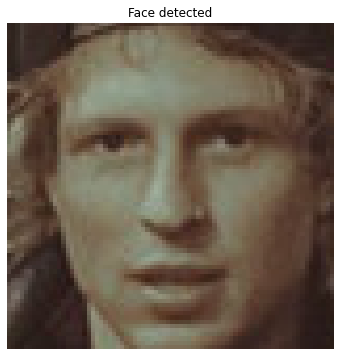

{'r': 307, 'c': 825, 'width': 63, 'height': 63}


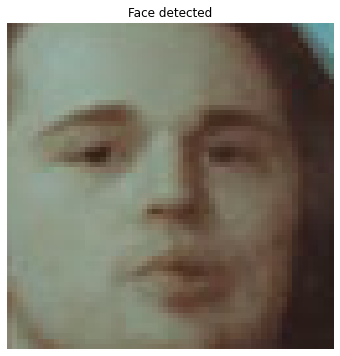

In [11]:
# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=im,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show detected faces
show_detected_face(im, detected)

### **Segmentation and face detection**

Previously, you learned how to make processes more computationally efficient with unsupervised superpixel segmentation. In this exercise, you'll do just that!

Using the slic() function for segmentation, pre-process the image before passing it to the face detector.

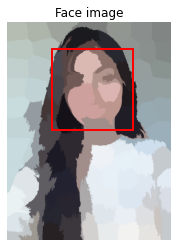

{'r': 108, 'c': 180, 'width': 328, 'height': 328}


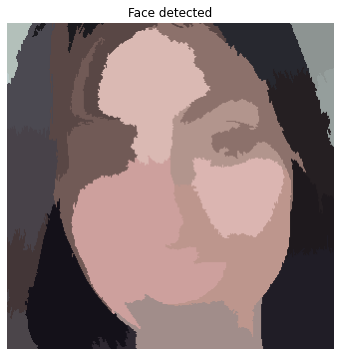

In [15]:
from skimage.segmentation import slic
from skimage.color import label2rgb
im=plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/Chapter4/face_det9.jpg')
# Obtain the segmentation with default 100 regions
segments = slic(im)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, im, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

We applied segementation to the image before passing it to the face detector and it's finding the face even when the image is relatively large. This time we  used 1000 by 1000 pixels as the maximum size of the searching window because the face in this case was indeed rather larger in comparison to the image.

### **Real World Samples**

In [23]:
def getFaceRectangle(image, d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face
    face= image[ x:width, y:height]
    return face

def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] = gaussian_image
    return original

def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')   

<ipython-input-24-8246a236597d>:17: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  blurred_face = gaussian(face, multichannel=True, sigma=8, preserve_range=True)


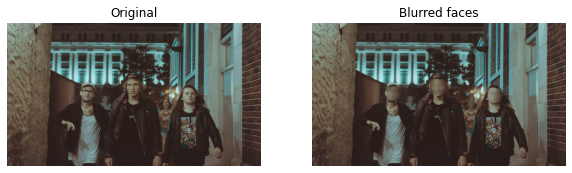

In [24]:
from skimage.filters import gaussian

group_image = plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/Chapter4/face_det25.jpg')
group_image_o = group_image.copy()

# Detect the faces
detected = detector.detect_multi_scale(img=group_image, scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10), max_size=(100, 100))

# For each detected face
for d in detected:
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(group_image, d)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, multichannel=True, sigma=8, preserve_range=True)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face)
    
plot_comparison(group_image_o, resulting_image, 'Blurred faces')

## **Reconstruction of Damaged images**

1. Rotating it to be uprightusing rotate()
2. Applying noise reduction with denoise_tv_chambolle()
3. Reconstructing the damaged parts with inpaint_biharmonic() from the inpaint module.

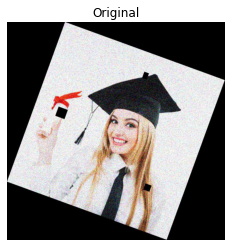

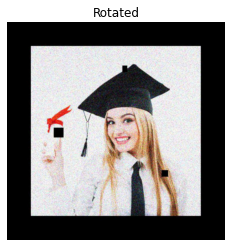

In [28]:
im=plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/Chapter4/sally_damaged_image.jpg')
# Rotate the image
from skimage.transform import rotate
imr=rotate(im,20)
plt.imshow(im);plt.title('Original');plt.axis('off');plt.show()
plt.imshow(imr);plt.title('Rotated');plt.axis('off');plt.show()

<ipython-input-31-7f2e9135df72>:3: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_im=denoise_tv_chambolle(imr,multichannel=True)


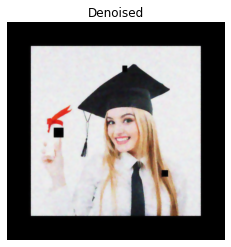

In [31]:
#DEnoise image
from skimage.restoration import denoise_tv_chambolle
denoise_im=denoise_tv_chambolle(imr,multichannel=True)
plt.imshow(denoise_im);plt.title('Denoised');plt.axis('off');plt.show()

In [37]:
import numpy as np
def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

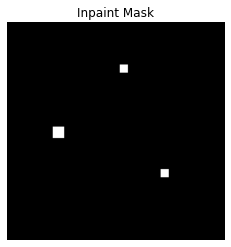

<ipython-input-39-67724f46c4f9>:5: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  inpaint_out=inpaint.inpaint_biharmonic(denoise_im,mask,multichannel=True)


In [39]:
#inpaint the image
from skimage.restoration import inpaint
mask = get_mask(denoise_im)
plt.imshow(mask);plt.title('Inpaint Mask');plt.axis('off');plt.show()
inpaint_out=inpaint.inpaint_biharmonic(denoise_im,mask,multichannel=True)

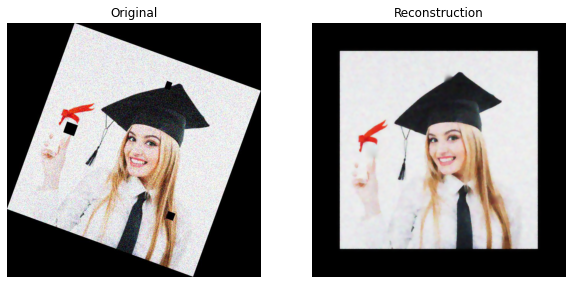

In [41]:
# Show the resulting image
plot_comparison(im, inpaint_out, "Reconstruction")